# Importing libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

# Reading & previewing the dataset

In [3]:
cc_data = pd.read_excel(r"C:\Users\chide\Documents\BankChurners.xlsx", 'BankChurners (2)')

In [4]:
cc_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Age Range,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Avg_Trans_amt per Customer,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Standardized Avg payment,Standardized Avg ratio,Standardized total trans ct,Unnamed: 26,Unnamed: 27
0,768805383,Existing Customer,45,36 - 46,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,27.238095,1.625,0.061,-1.343567,-0.863681,-1.163776,NaN,NaN
1,818770008,Existing Customer,49,46 - 56,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,39.121212,3.714,0.105,-0.889826,-0.702254,-1.556463,NaN,NaN
2,713982108,Existing Customer,51,46 - 56,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,94.350000,2.333,0.000,1.219011,-1.087479,-2.123678,NaN,NaN
3,769911858,Existing Customer,40,36 - 46,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,58.550000,2.333,0.760,-0.147964,1.700818,-2.123678,NaN,NaN
4,709106358,Existing Customer,40,36 - 46,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,29.142857,2.500,0.000,-1.270836,-1.087479,-1.774622,NaN,NaN


In [5]:
len(cc_data)

8500

In [5]:
cc_data['Attrition_Flag'].unique()

array(['Existing Customer'], dtype=object)

# Creating Clusters

In [6]:
std_data = cc_data[['Standardized Avg payment', 'Standardized Avg ratio', 'Standardized total trans ct']]
std_data.head()

,Standardized Avg payment,Standardized Avg ratio,Standardized total trans ct
0,-1.343567,-0.863681,-1.163776
1,-0.889826,-0.702254,-1.556463
2,1.219011,-1.087479,-2.123678
3,-0.147964,1.700818,-2.123678
4,-1.270836,-1.087479,-1.774622


In [7]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(std_data)
cluster_labels = kmeans.labels_
std_data['cluster'] = cluster_labels
#std_data.head(100)

C:\Users\chide\AppData\Local\Temp\ipykernel_19988\1302240245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std_data['cluster'] = cluster_labels


In [8]:
std_data['cluster'] = std_data['cluster'].replace({0: 'A', 1: 'B', 2: 'C', 3: 'D'})
std_data['cluster'].unique()


C:\Users\chide\AppData\Local\Temp\ipykernel_19988\2799206322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std_data['cluster'] = std_data['cluster'].replace({0: 'A', 1: 'B', 2: 'C', 3: 'D'})


array(['C', 'B', 'A', 'D'], dtype=object)

## Visualising clusters

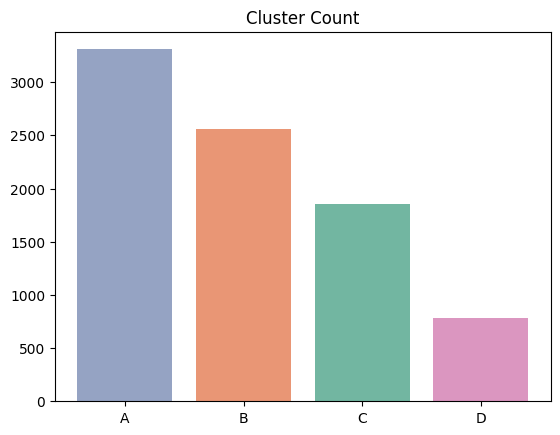

cluster
A    3309
B    2557
C    1855
D     779
Name: count, dtype: int64

In [9]:
check = std_data['cluster'].value_counts()

x = check.index
y = check.values
colr = ('#95A3C3', '#E99675', '#72B6A1', '#DB96C0')
plt.bar(x, y, color = colr)
plt.title('Cluster Count')
plt.show()

std_data['cluster'].value_counts()

# Analysing clusters

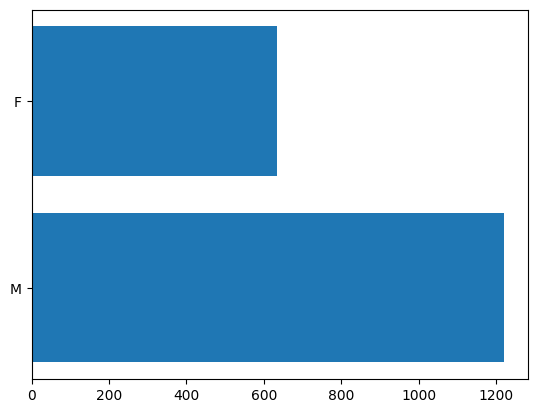

In [10]:
cc_data['cluster'] = cluster_labels
cc_data['cluster'] = cc_data['cluster'].replace({0: 'A', 1: 'B', 2: 'C', 3: 'D'})

_cluster = cc_data[cc_data['cluster'] == 'C']

card = _cluster['Gender'].value_counts()

y = card.index
x = card.values

plt.barh(y, x)
plt.show()

In [11]:
#len(cc_data[(cc_data['cluster'] == 'D') & (cc_data['Avg_Utilization_Ratio'] > 0.4)])

In [12]:
'''mean = cc_data[cc_data['cluster'] == 'C'][['Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Months_Inactive_12_mon']].describe()
pd.DataFrame(mean)

mean['Total_Trans_Amt'].iloc[1]'''

"mean = cc_data[cc_data['cluster'] == 'C'][['Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Months_Inactive_12_mon']].describe()\npd.DataFrame(mean)\n\nmean['Total_Trans_Amt'].iloc[1]"

# Statistical Analysis on the Clusters

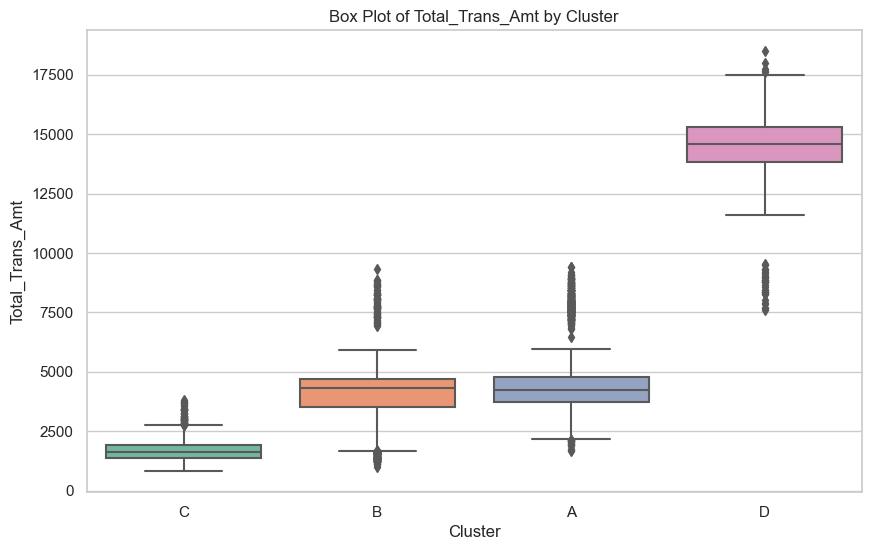

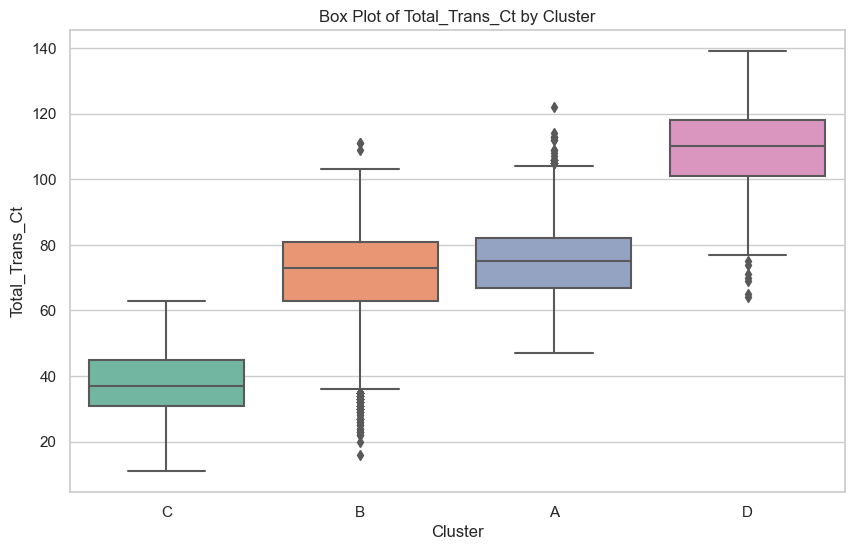

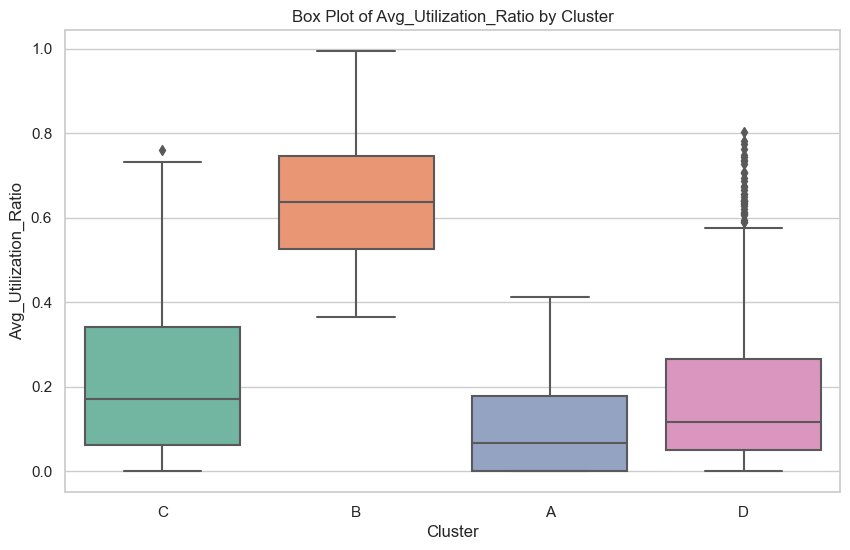

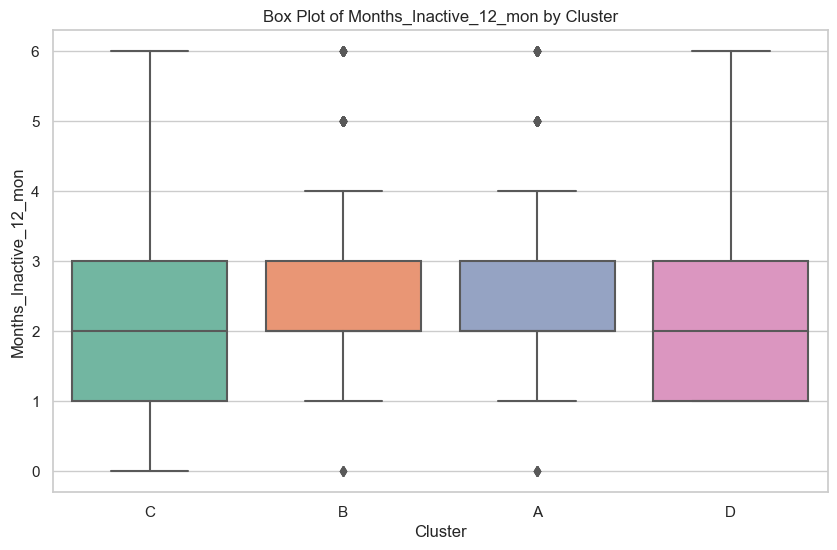

In [13]:
cc_data['cluster'] = cluster_labels
cc_data['cluster'] = cc_data['cluster'].replace({0: 'A', 1: 'B', 2: 'C', 3: 'D'})

'''spending_behaviour = cc_data['cluster'].unique()

for s in spending_behaviour:
    s_p = cc_data[cc_data['cluster'] == s][['Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Months_Inactive_12_mon']].describe()
    s_p = pd.DataFrame(s_p)
    
    print()
    print('s_p:', s)
    print(s_p)'''


# Set style and palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

# create numerical columns
numerical_columns = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Months_Inactive_12_mon']

# Plot box plots for each numerical variable within each cluster
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x = 'cluster', y = column, data = cc_data, palette = palette)
    plt.title(f'Box Plot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
   
    '''    # Annotate the median value for each box
    medians_cl = cc_data.groupby('cluster')[column].mean()
    for tick, label in zip(range(len(medians_cl)), medians_cl.index):
        plt.text(tick, medians_cl[label], f'{medians_cl[label]:.2f}', ha='center', va='bottom', fontsize=8)'''
    
    
    plt.show()



    

# Statistical Analysis on the Card category

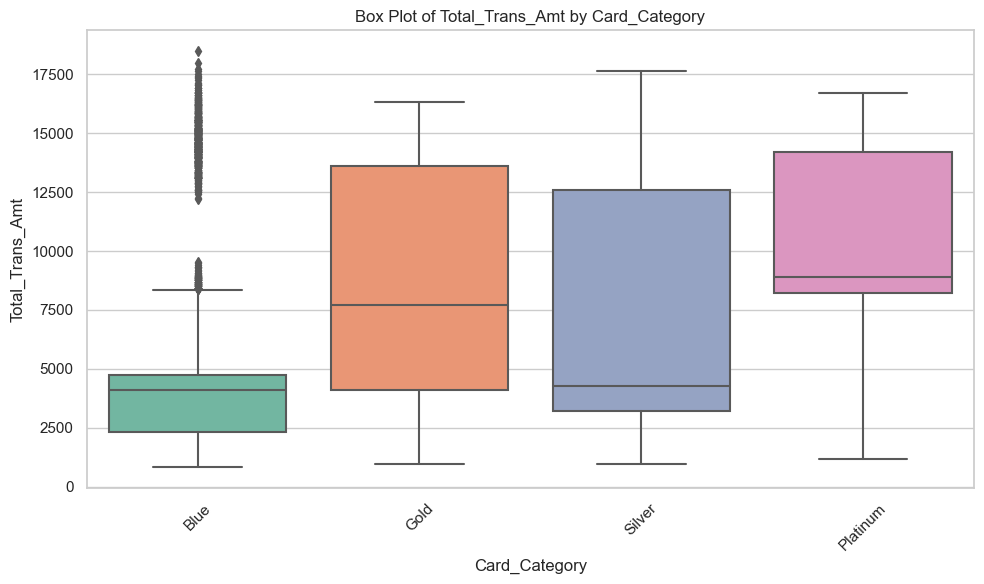

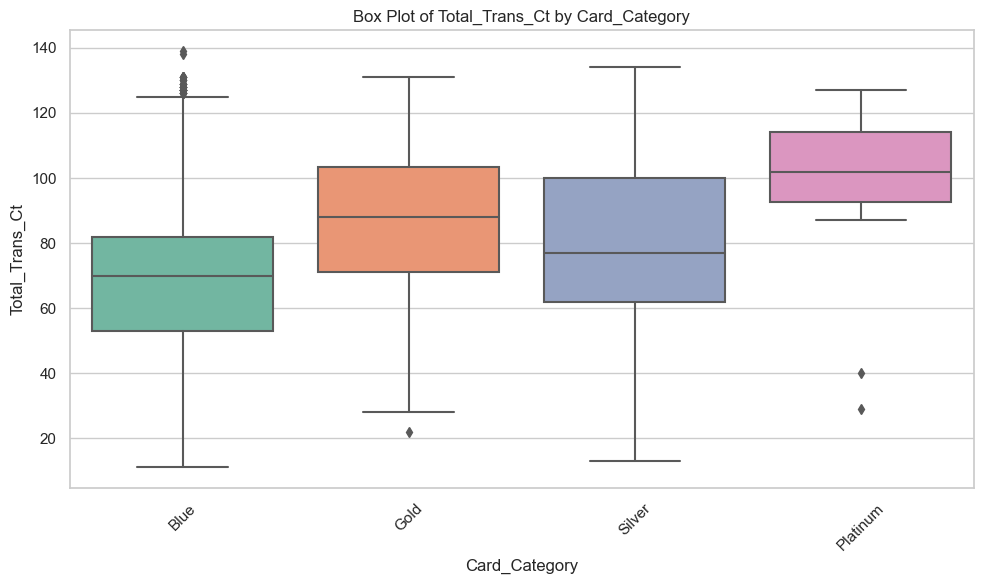

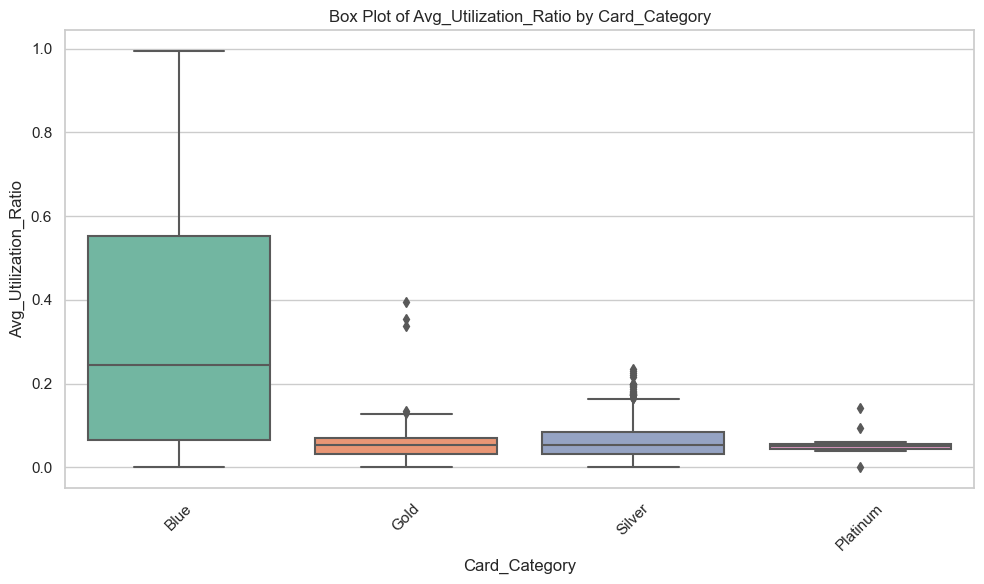

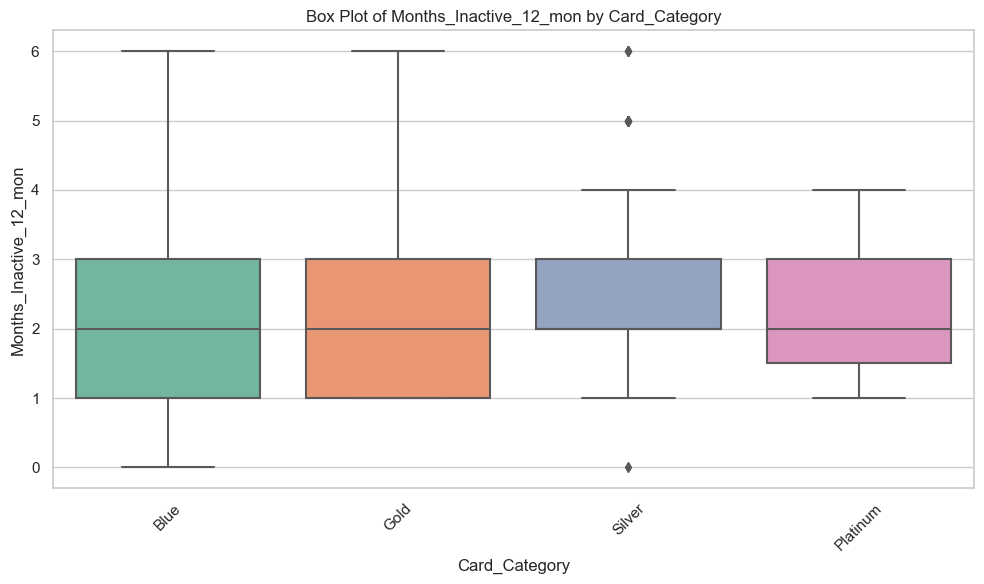

In [14]:
card_cat = cc_data['Card_Category'].unique()

'''for c in card_cat:
    cc_cat = cc_data[cc_data['Card_Category'] ==  c][['Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Months_Inactive_12_mon']].describe()
    print()
    print('cc_cat:', c)
    print(cc_cat)'''

# Define numerical columns
numerical_columns = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Months_Inactive_12_mon']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x = 'Card_Category', y = column, data= cc_data, palette = palette)
    plt.title(f'Box Plot of {column} by Card_Category')
    plt.xlabel('Card_Category')
    plt.ylabel(column)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()

    '''# Annotate the median value for each box
    medians_cc = cc_data.groupby('Card_Category')[column].mean()
    for tick, label in zip(range(len(medians)), medians_cc.index):
        plt.text(tick, medians_cc[label], f'{medians_cc[label]:.2f}', ha='center', va='bottom', fontsize=8)'''

# Statistical Analysis on the Age category

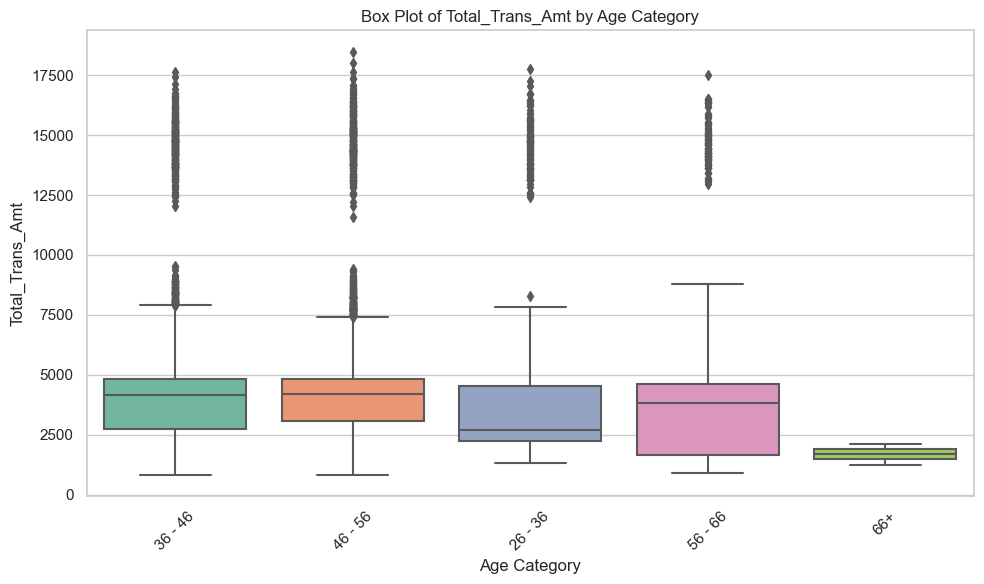

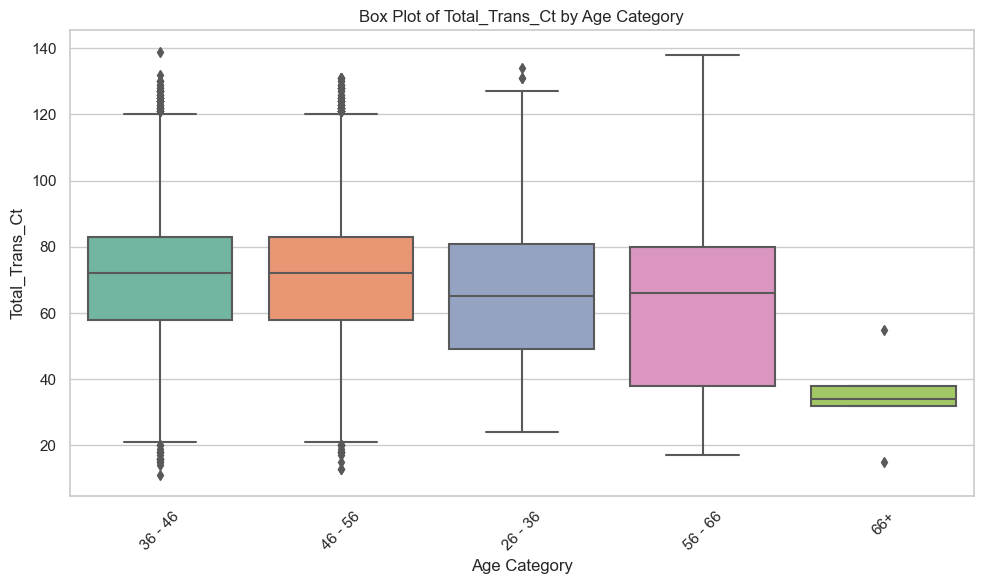

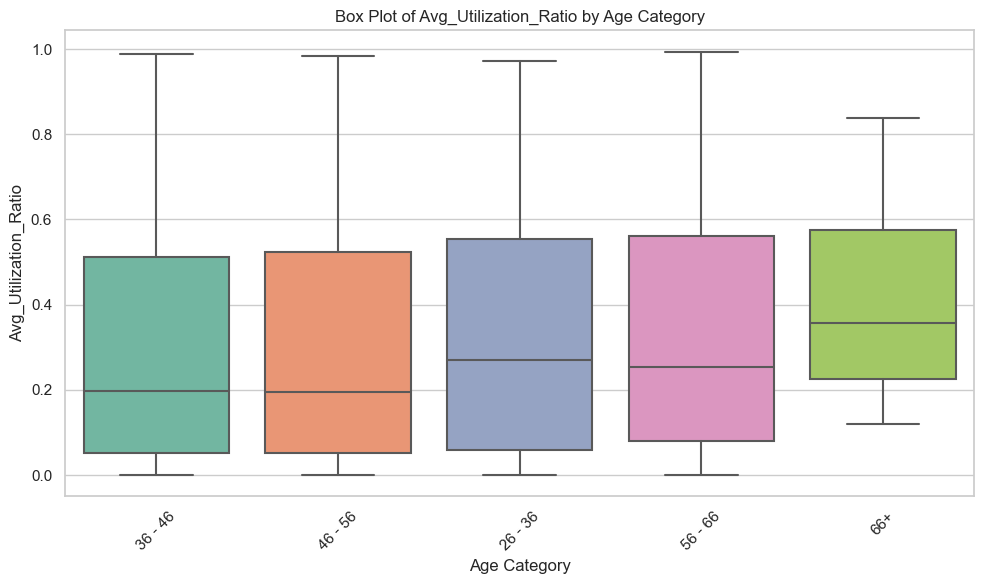

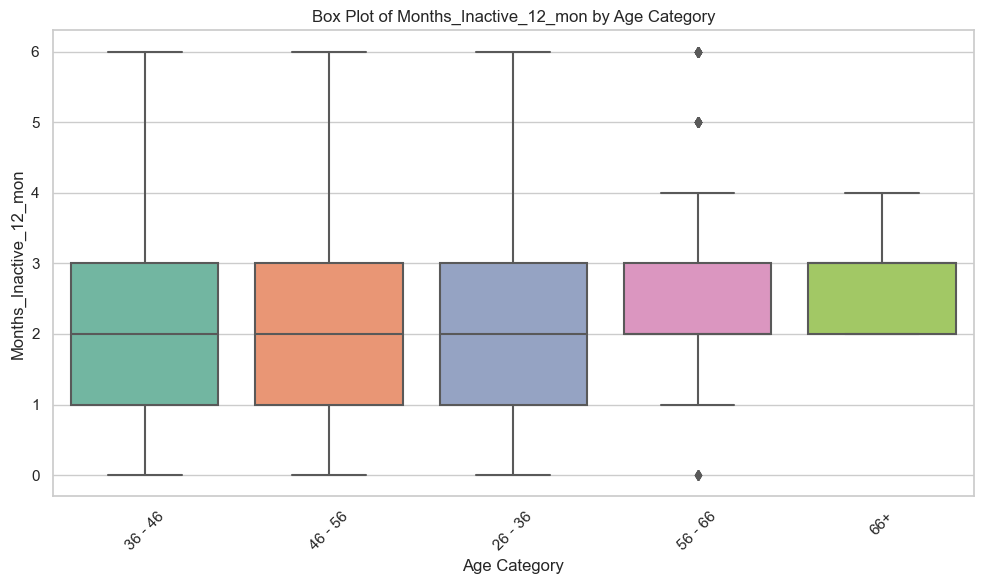

In [15]:
'''for a in age_cat:
    age_cat = cc_data[cc_data['Age Range'] == a][['Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Months_Inactive_12_mon']].describe()
    age_cat = pd.DataFrame(age_cat)
    print()
    print('age_cat:', a)
    print(age_cat)'''

# Define numerical columns
numerical_columns = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Months_Inactive_12_mon']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x = 'Age Range', y = column, data= cc_data, palette = palette)
    plt.title(f'Box Plot of {column} by Age Category')
    plt.xlabel('Age Category')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




# Statistical Analysis on Marital Status

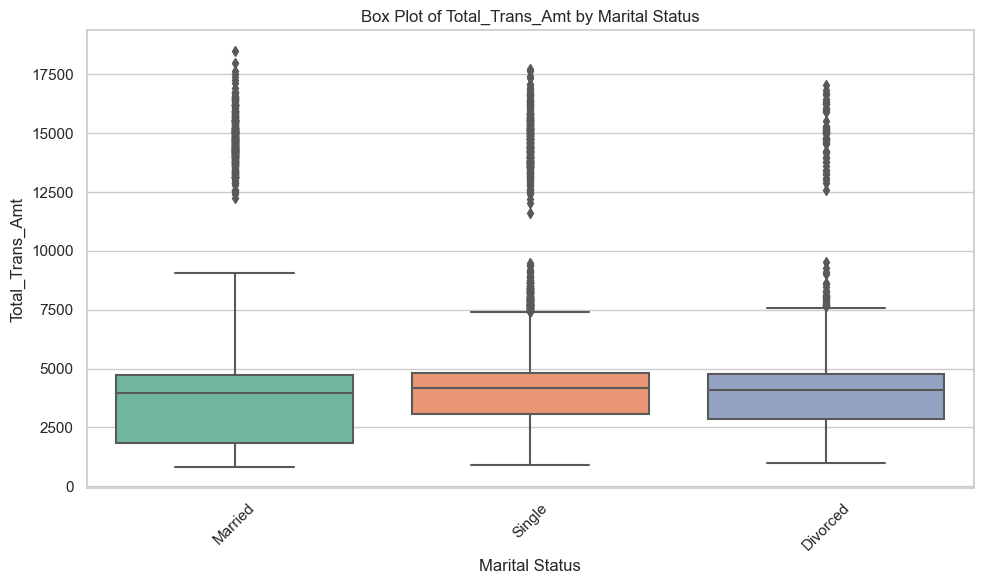

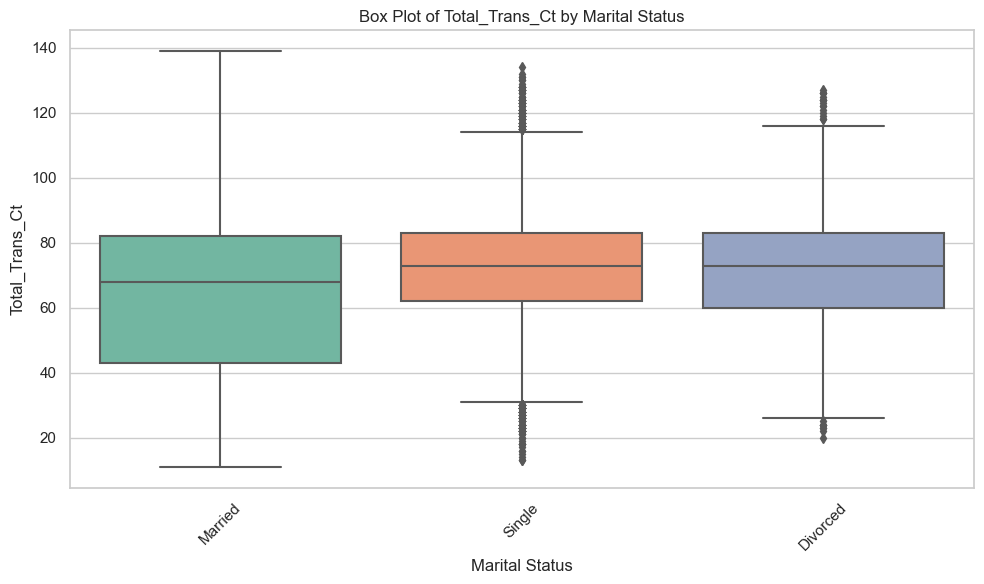

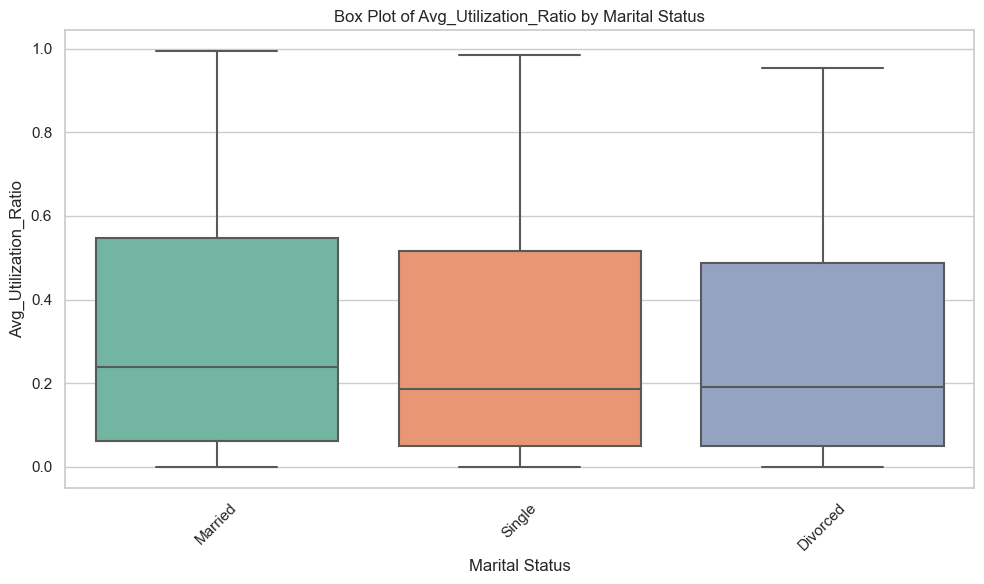

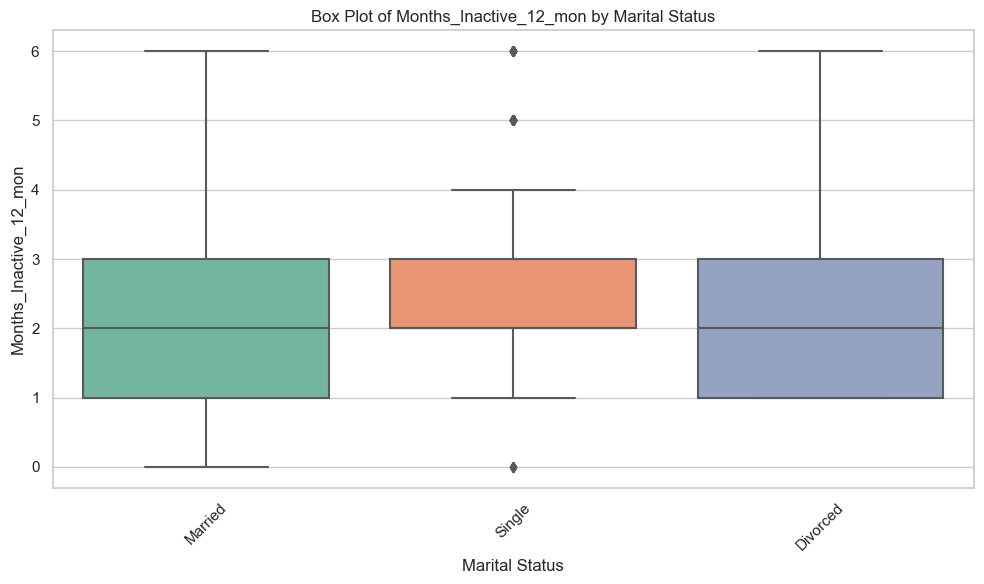

In [16]:
'''for m in Marital_cat:
    Marital_cat = cc_data[cc_data['Marital_Status'] == m][['Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Months_Inactive_12_mon']].describe()
    print("Marital_cat:", m)
    print()
    print(Marital_cat)'''

cc_data_filtered = cc_data[cc_data['Marital_Status'] != 'Unknown']

# Plot box plots for each numerical variable within each marital status category
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x ='Marital_Status', y = column, data = cc_data_filtered, palette = palette)
    plt.title(f'Box Plot of {column} by Marital Status')
    plt.xlabel('Marital Status')
    plt.ylabel(column)
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.show()







# Statistical Analysis on the Income category

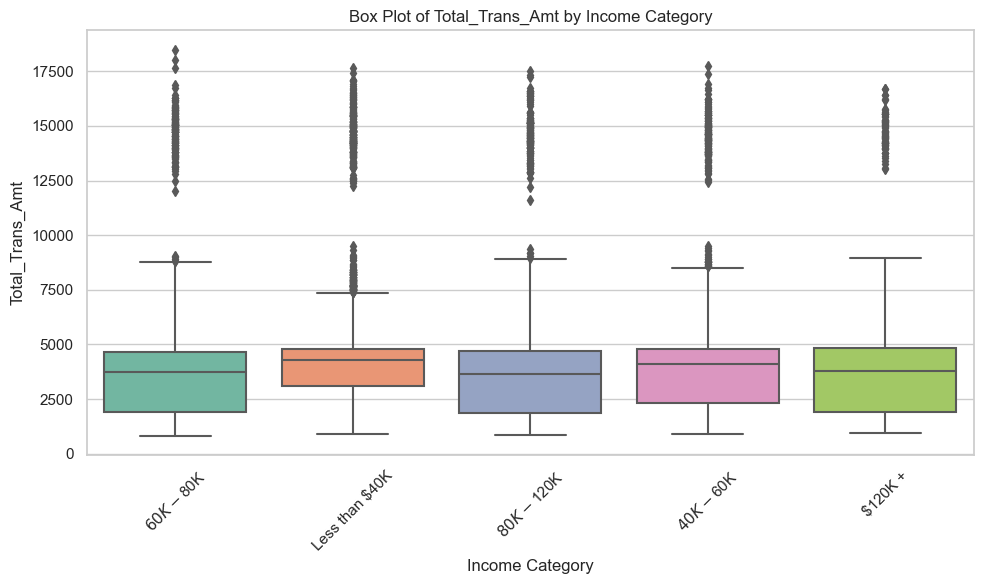

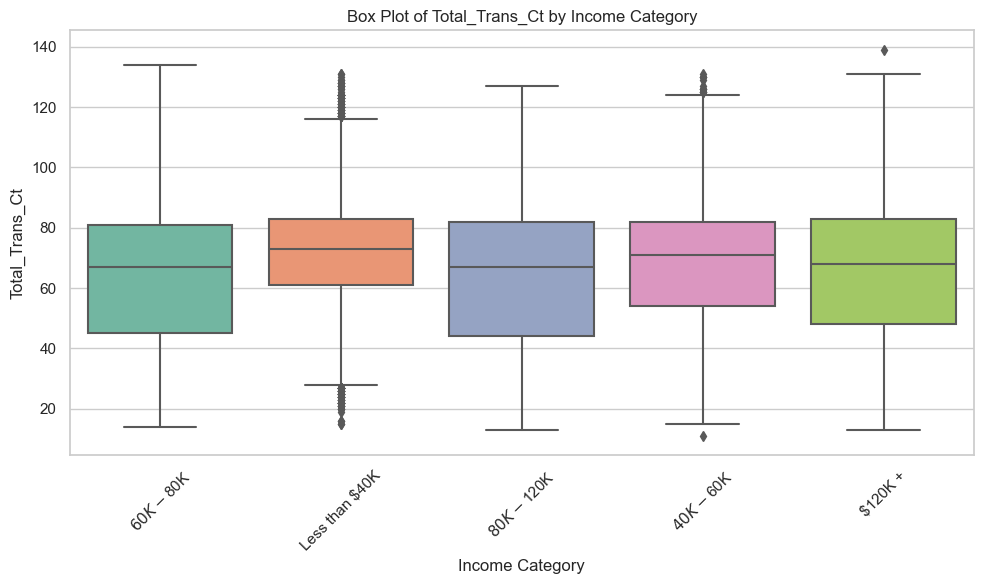

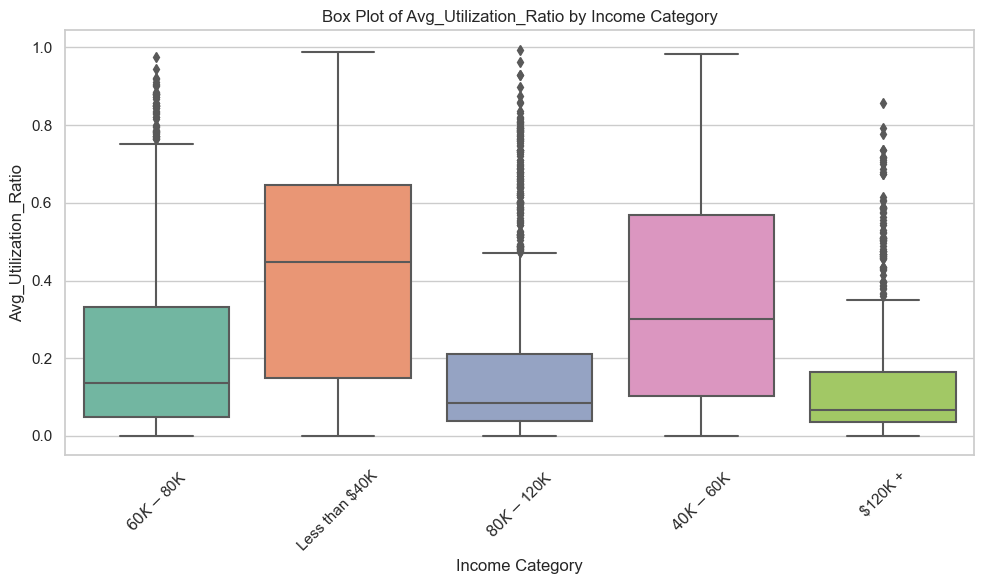

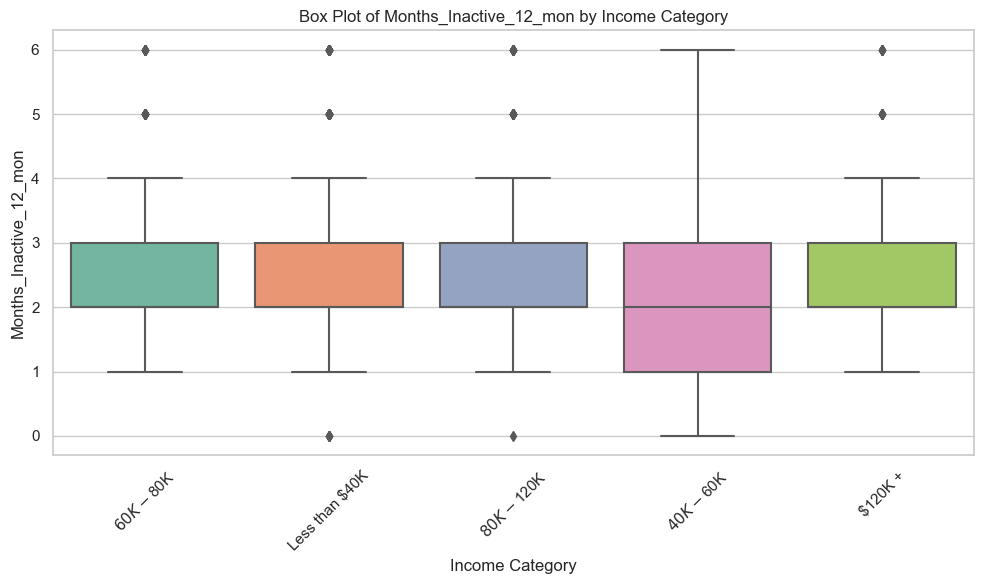

In [17]:
cc_data_filtered = cc_data[cc_data['Income_Category'] != 'Unknown']

income_cat = cc_data['Income_Category'].unique()

'''for i in income_cat:
    income_cat = cc_data[cc_data['Income_Category'] == i][['Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Months_Inactive_12_mon']].describe()
    income_cat = pd.DataFrame(income_cat)
    print('income_cat:', i)
    print()
    print(income_cat)'''

# Plot boxplot for each numerical variable within each income category
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x ='Income_Category', y = column, data = cc_data_filtered, palette = palette)
    plt.title(f'Box Plot of {column} by Income Category')
    plt.xlabel('Income Category')
    plt.ylabel(column)
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()


In [19]:
len(cc_data)

8500